In [1]:
import numpy as np
import matplotlib.pyplot as plt
from trigger import *
from time import time

n_sample = 1000
amplitude = np.linspace(10, 100, 10)

In [2]:
total_eff = []
start = time()
for amp in amplitude:
    signals = []
    single_eff = []
    
    for i in range(n_sample):
        signals.append(gen_signal(baseline=-10, amplitude=amp, noise_lev=1, plot=False))

    min = derivative_trigger_matrix(signals, window_ma=15, n=2, plot=False)
    # Ho definito una nuova funzione per il calcolo dell'efficienza, ha solo un ciclo interno,
    # cerchiamo di ragionare ciclo dentro funzione e non funzione dentro a ciclo per lavorare
    # meglio in termini prestazionali, a maggior ragione se chiamiamo funzioni esterne
    single_eff = efficiency_matrix(min)
    total_eff.append(get_efficiency(single_eff, n_sample))
print('Tempo computazionale: ' + str(time()-start))

Tempo computazionale: 7.728569030761719


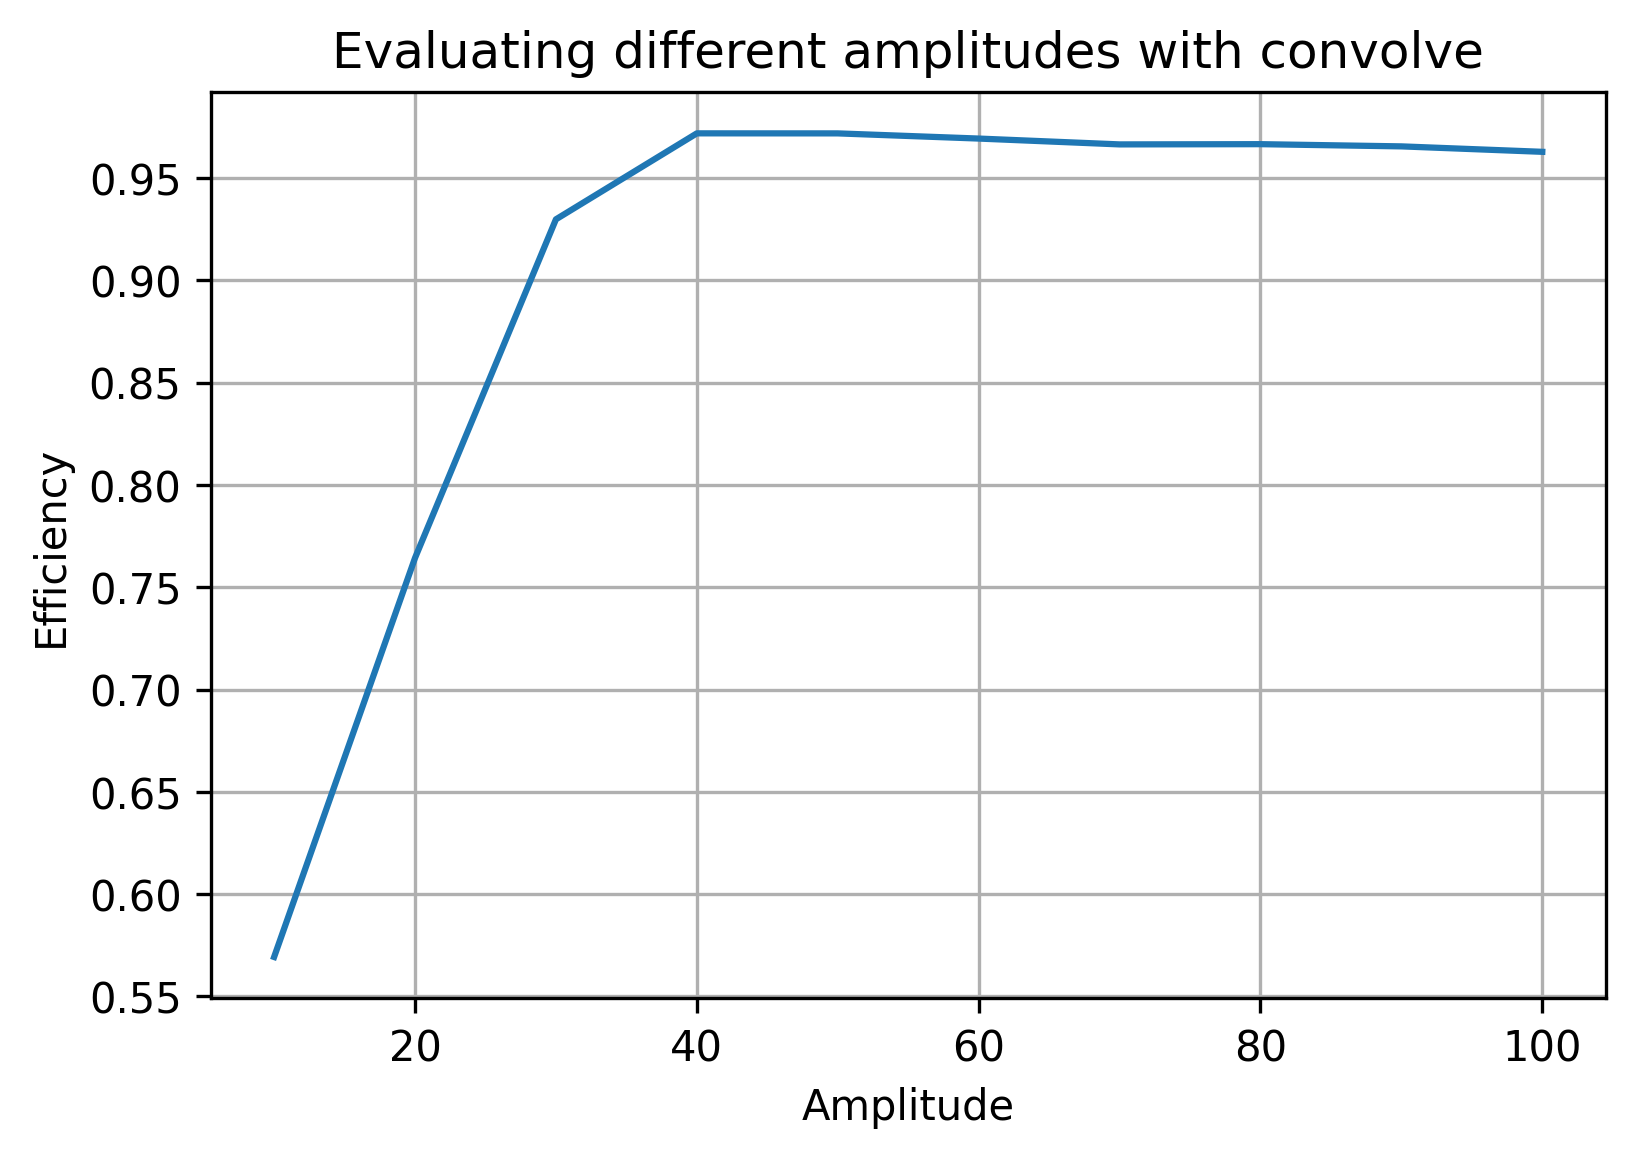

In [3]:
good_plot(amplitude, total_eff, 'Evaluating different amplitudes with convolve', 'Amplitude', 'Efficiency')

In [5]:
total_eff = []
start = time()
for amp in amplitude:
    signals = []
    single_eff = []
    
    for i in range(n_sample):
        signals.append(gen_signal(baseline=-10, amplitude=amp, noise_lev=1, plot=False))

    # Ho aggiunto una variabile window_ma per la moving average e selezionare la moving average, di default è convolve,
    # in questo caso è cumsum, come si vede dai grafici, l'efficienza è al di sotto del 95%, meno performante del convolve
    # teniamolo come campione di riferimento, cumsum non usa dei pesi
    min = derivative_trigger_matrix(signals, window_ma=15, n=2, mv='cumsum', plot=False)
    single_eff = efficiency_matrix(min)
    total_eff.append(get_efficiency(single_eff, n_sample))
print('Tempo computazionale: ' + str(time()-start))

Tempo computazionale: 10.302235126495361


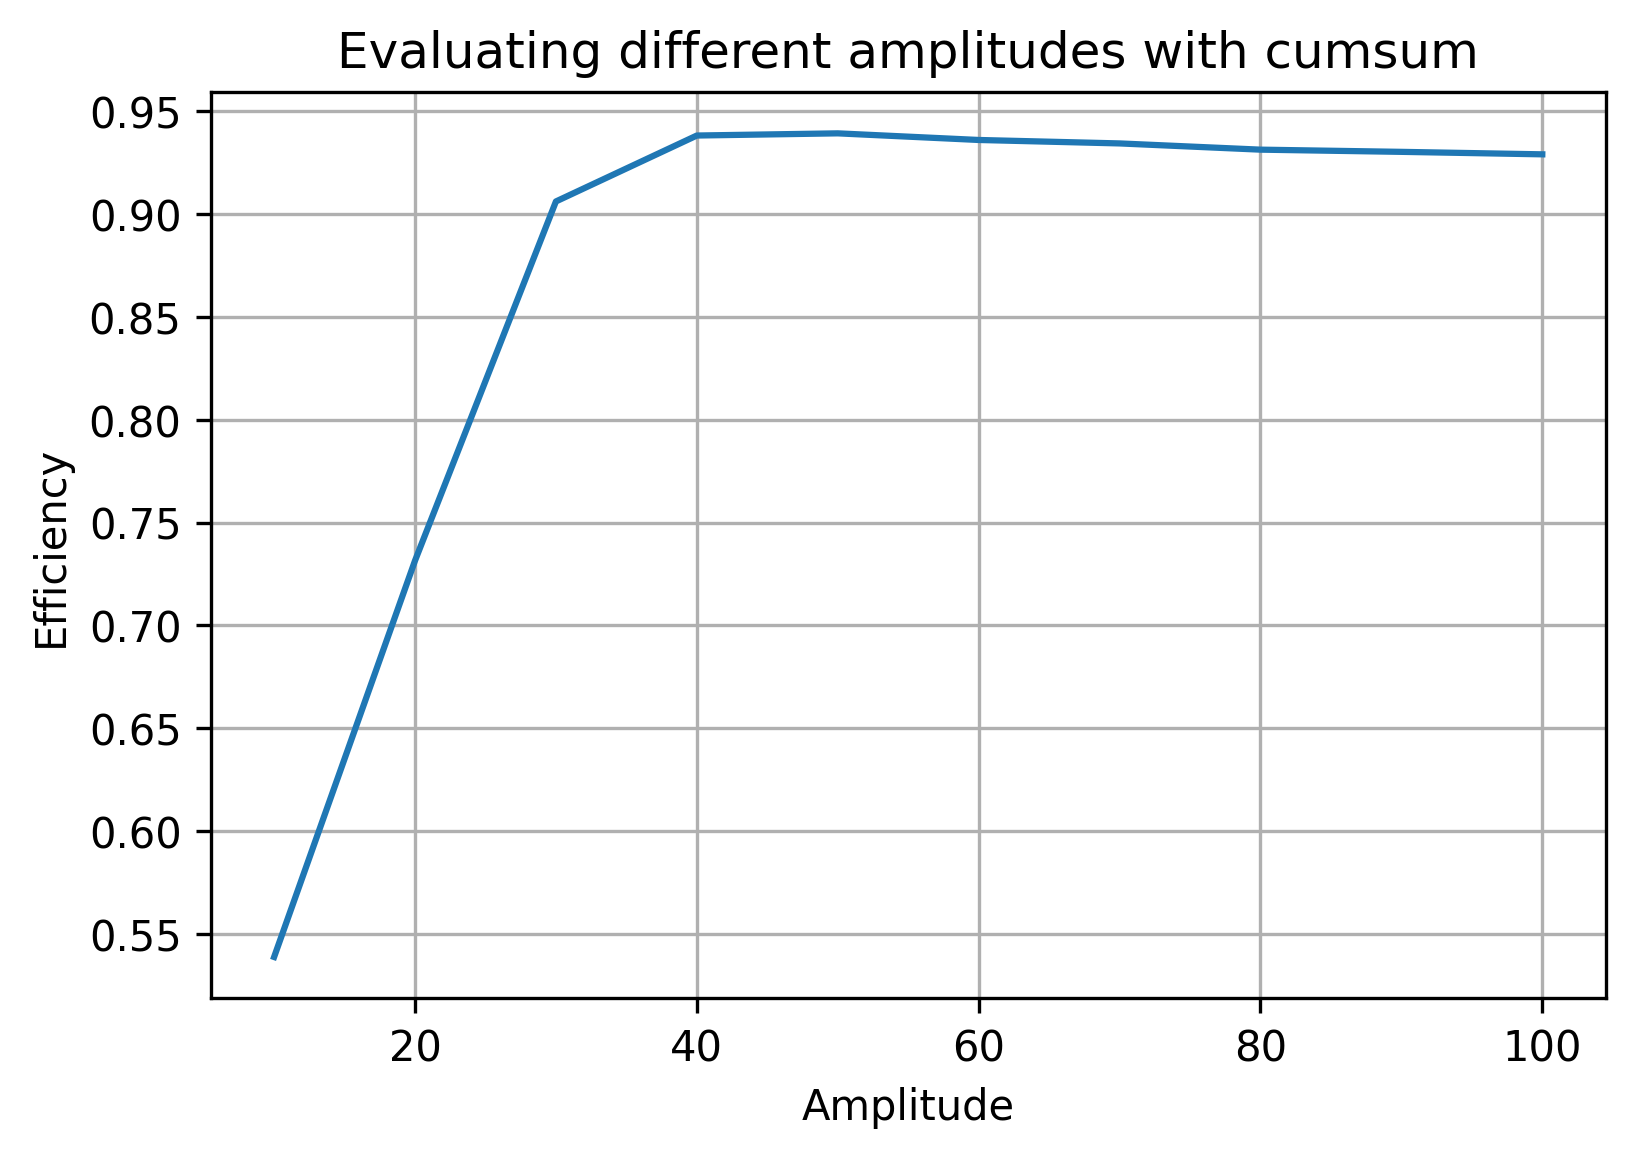

In [6]:
good_plot(amplitude, total_eff, 'Evaluating different amplitudes with cumsum', 'Amplitude', 'Efficiency')